In [2]:
#!jupyter nbconvert --to=python MLDspatial_python3.ipynb

# After changes in the script using Jupyter notebook, save the notebook, run this line, and clear the output.

[NbConvertApp] Converting notebook MLDspatial.ipynb to python
[NbConvertApp] Writing 11011 bytes to MLDspatial.py


In [19]:
class MLDspatial_global:
    
    def __init__(self,runname,resultpath,savepath,meshpath,first_year,last_year,
                 WOAvar='n_an',
                 mapproj = 'pc',
                 savefig=False):

        self.runname = runname
        self.resultpath = resultpath
        self.savepath = savepath
        self.meshpath = meshpath
        self.fyear = first_year
        self.lyear = last_year
        self.mapproj = mapproj
        self.savefig = savefig


        import matplotlib.pyplot as plt
        import numpy as np
        #from netCDF4 import Dataset
        #from scipy.interpolate import griddata
        import skill_metrics as sm
        import cartopy.crs as ccrs
        #import pickle

        import pyfesom2 as pf
        
        # load FESOM data -------------------------------------------------------------------------------------
        mesh       = pf.load_mesh(meshpath)
        years = [self.fyear, self.lyear]

        # check variables
        #NCfesom = self.resultpath + '/MLD1.'+self.runname+'.'+str(self.fyear)+'.nc'
        #!ncdump -h $NCfesom

        labelfesom = 'MLD1 {0}-{1}'.format(self.fyear,self.lyear)
        unitfesom = 'MLD1 [m]' 

        # load data -------------------------------------------------------------------------------------
        MLDmax = pf.get_data(resultpath, "MLD1", years, mesh, how="max", compute=True, runid=self.runname)
        MLDmin = pf.get_data(resultpath, "MLD1", years, mesh, how="min", compute=True, runid=self.runname)
        MLDmean = pf.get_data(resultpath, "MLD1", years, mesh, how="mean", compute=True, runid=self.runname)

        print(np.shape(MLDmax))

        
        #-----------------------------------------------
        # reading modelled CO2 flux
        #-----------------------------------------------
        
        #var_id ='omldamax'         # daily maximum ocean mixed layer thickness [m] defined by mixing scheme
        #var_id2 ='mlotst'          # mixed layer depth [m], computed with Levitus method (with 0.125 kg/m3 criterion)
        
        print("*** Not sure wich method is used. ***\nPrevious FESOM1.4 methods were: \nomldamax \nmlotst")
        #print("'omldamax': daily maximum ocean mixed layer thickness [m] defined by mixing scheme")
        #print("'mlotst'  : mixed layer depth [m], computed with Levitus method (with 0.125 kg/m3 criterion)")
        
 

        # plot ------------------------------------               
        figMLD = pf.plot(mesh, [MLDmax, MLDmin, MLDmean],
                        rowscol = (3,1),
                        #levels = (0,35,36),
                        units = unitfesom, 
                        mapproj=self.mapproj, # robinson projection takes more time!
                        titles=['max '+labelfesom,'min '+labelfesom,'mean '+labelfesom],
                        cmap='RdYlGn',
                        figsize = (20,20))
        
        if(self.savefig == True):
            plt.savefig(self.savepath+self.runname+'_'+'MLDspatial'+'_'+str(years[0])+'to'+str(years[1])+'.png', 
                    dpi = 300, bbox_inches='tight')
            
        plt.show(block=False)

The mesh will be loaded from /work/ollie/mozeisin/mesh/mesh_fesom2.0/core2_meanz/pickle_mesh_py3_fesom2
Depth is None, 3d field will be returned
Depth is None, 3d field will be returned
Depth is None, 3d field will be returned
(126858,)
Not sure wich method is used. 
 Previous F1.4 possible methods were: 
'omldamax': daily maximum ocean mixed layer thickness [m] defined by mixing scheme
'mlotst'  : mixed layer depth [m], computed with Levitus method (with 0.125 kg/m3 criterion)


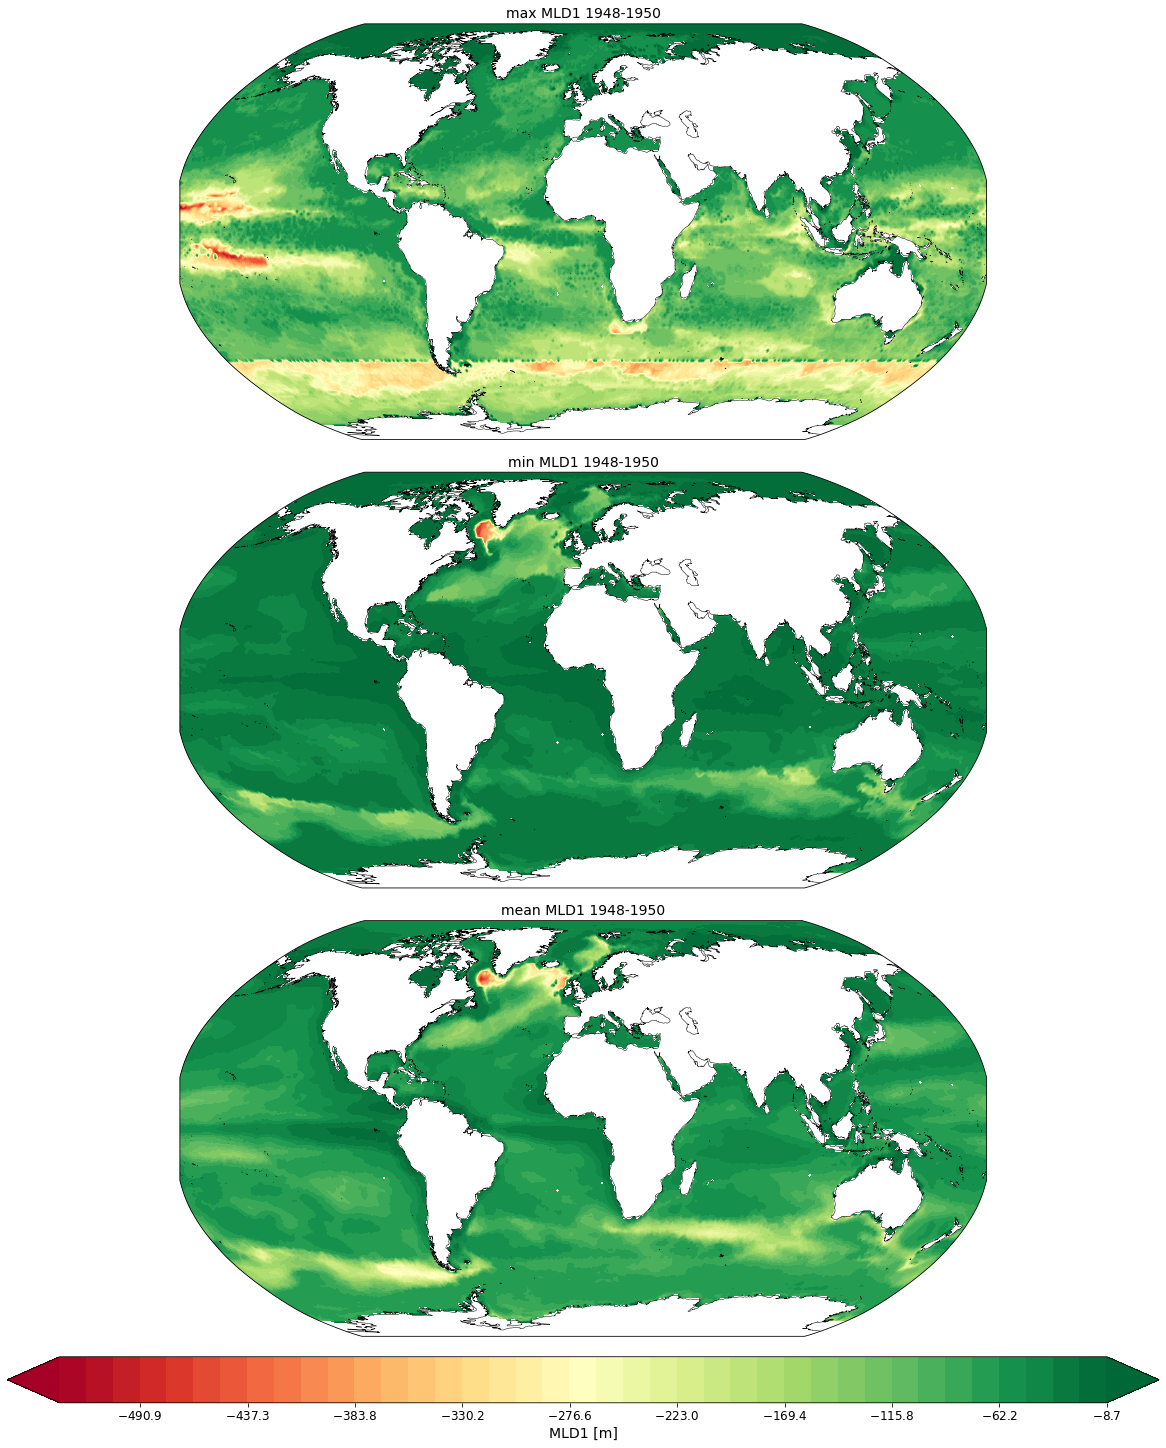

In [20]:
### TESTING ###
if __name__ == "__main__":
    
    # run specification -------------------------------------------------------------------------------------
    runid      =  'mo1'
    layerwise    = False

    resultpath = '/work/ollie/mozeisin/results/f2r1.2/' + runid
    savepath = '/home/ollie/mozeisin/evaluation/mo_files/'

    htmlname     =  runid + '.html'
    htmlpath = '/home/ollie/mozeisin/evaluation/mo_files/html/'

    meshpath = '/work/ollie/mozeisin/mesh/mesh_fesom2.0/core2_meanz'

    # period of analysis ------------------------------------------------------------------------------------

    first_year = 1948
    last_year  = 1950
    years = [first_year, last_year]

    # now test:
    test = MLDspatial_global(runid,resultpath,savepath,meshpath,first_year,last_year,savefig=False)